penguins 데이터셋에 대하여 3가지 classification 알고리즘을 적용하여 모델을 생성한 후,  

각각에 대한 Confusion Matrix를 시각화하여 어떤 모델이 가장 분류를 잘 하였는지 논하여보세요.  

1. 데이터 탐색 및 전처리  

결측치, 이상치 처리  
데이터 분포 시각화  

2. Classification 알고리즘 활용 3가지 모델 학습  

Train/Test 데이터 분리  
모델 학습  
하이퍼파라미터 튜닝 (필요 시)  

3. Confusion Matrix 확인  

각각의 모델에 대한 혼돈 행렬 시각  
결과에 대하여 '텍스트' 셀을 생성한 후 작성  
생성한 모델 중 가장 높이 평가되는 모델에 대하여 정리  

*3가지 모델: RandomForestClassifier, GaussianNB, KNN - neighbors.KNeighborsClassifier

# RandomForestClassifier

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
df = sns.load_dataset("penguins")

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
df.dropna(inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
sex = pd.get_dummies(df['sex'],drop_first=True)
sex.head()

,Male
0,1
1,0
2,0
4,0
5,1


In [ ]:
island = pd.get_dummies(df['island'],drop_first=True)
island.head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


In [ ]:
new_data = pd.concat([df,island,sex],axis=1)
new_data.drop(['sex','island'],axis=1,inplace=True)
new_data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,0,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,0,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,0,0,0


In [ ]:
#loading datasets
y = new_data.species
y = y.map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
new_data.drop('species',inplace=True,axis=1)
X = new_data

Accuracy: 0.9850746268656716
Feature importances: [0.3348475  0.17499426 0.2372549  0.1008887  0.11485989 0.03191854
 0.00523622]


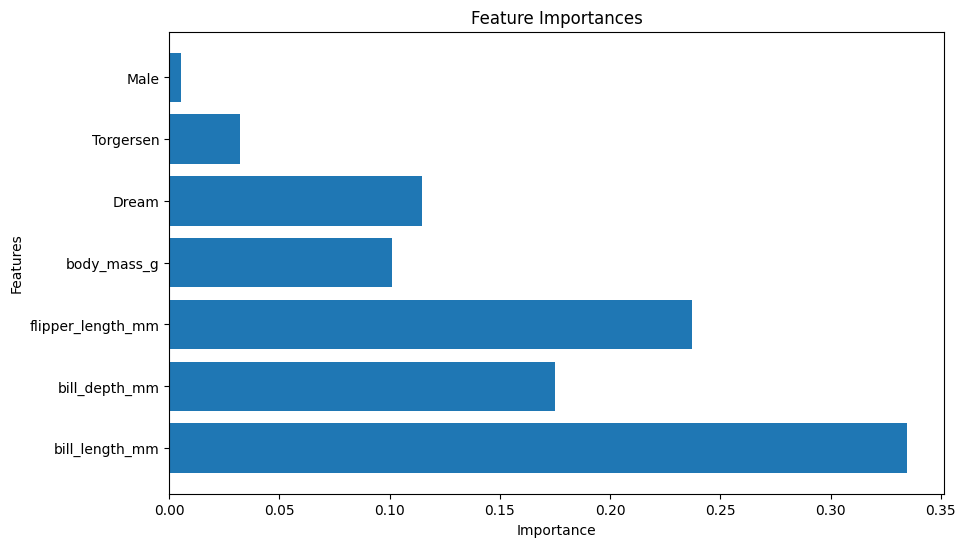

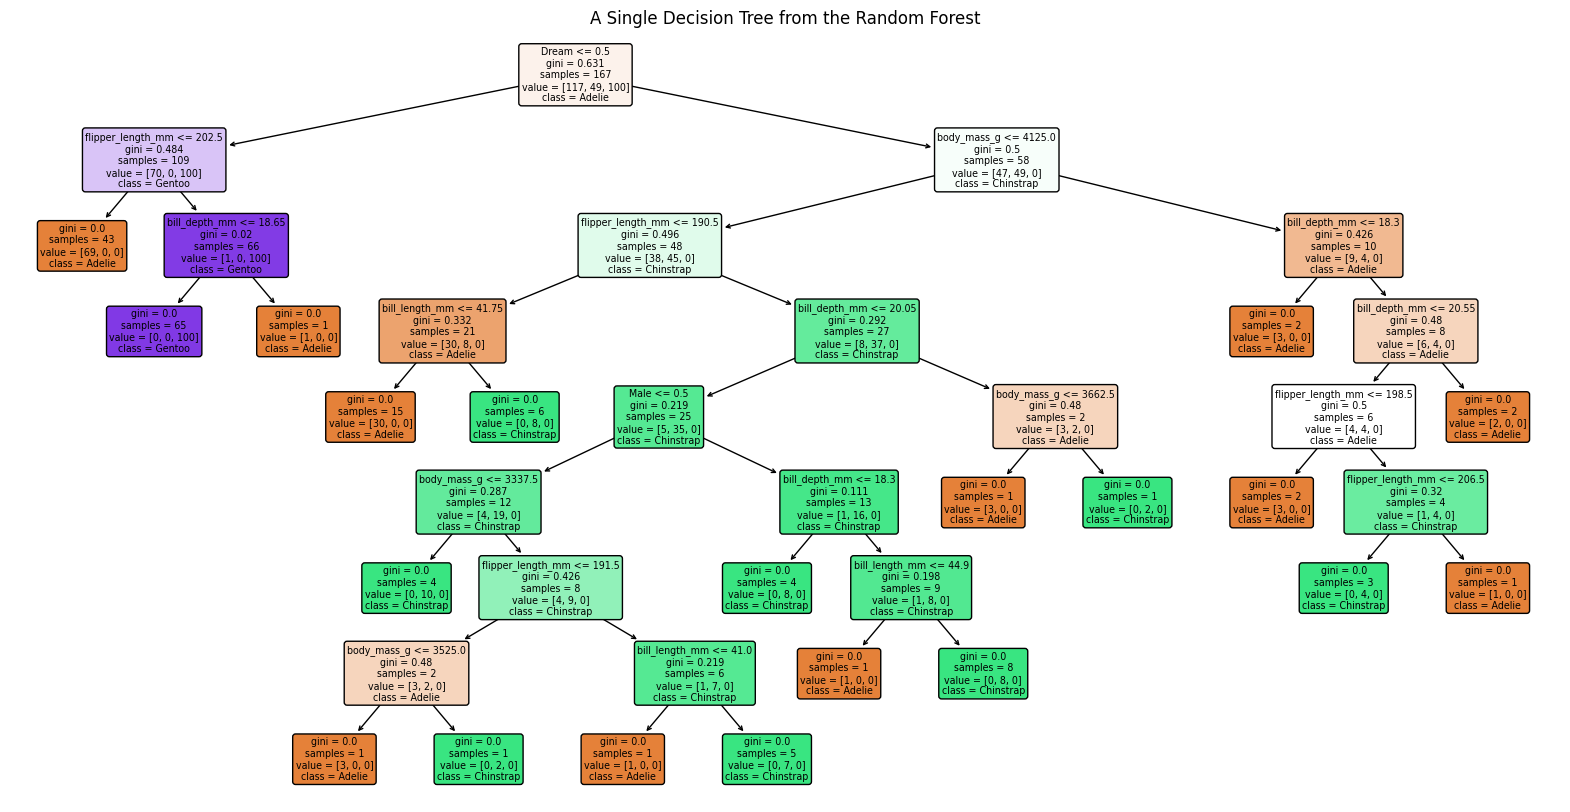

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Dream','Torgersen','Male']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importance
print("Feature importances:", rf.feature_importances_)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(columns, rf.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Plotting a single tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], rounded=True)
plt.title('A Single Decision Tree from the Random Forest')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[32  1  0]
 [ 0 15  0]
 [ 0  0 19]]


In [ ]:
accuracy_score(y_test,y_pred)

0.9850746268656716

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        19

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



# GaussianNB

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터 로드 및 결측치 제거

In [ ]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())
df.head()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## 텍스트 데이터 수치화

In [ ]:
sex = pd.get_dummies(df['sex'],drop_first=True)
island = pd.get_dummies(df['island'],drop_first=True)

In [ ]:
new_data = pd.concat([df,island,sex], axis=1)
new_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1


In [ ]:
y = new_data.species
y = y.map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

In [ ]:
new_data.drop(['species', 'island', 'sex'],inplace=True,axis=1)
new_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [ ]:
X = new_data

## GaussianNB 학습 및 결과 분석

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[38  1  0]
 [ 0 10  0]
 [ 0  0 18]]


##Accuray Score & Classification Report

In [ ]:
print(f" 정확도: {accuracy_score(y_test,y_pred):.4}")

 정확도: 0.9851


In [ ]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.97      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [ ]:
X_test.iloc[1]

bill_length_mm         35.7
bill_depth_mm          16.9
flipper_length_mm     185.0
body_mass_g          3150.0
Dream                   0.0
Torgersen               0.0
Male                    0.0
Name: 60, dtype: float64

##임의의 데이터에 대한 예측

In [ ]:
new_test_data = pd.DataFrame([[40,20,200,4000,0,0,0],[40,15,210,4000,0,0,0],[30,24,300,3000,1,0,1]], columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Dream','Torgersen','Male'])
new_pred = classifier.predict(new_test_data)
res = pd.Series(new_pred).map({0:'Adelie',1:'Chinstrap',2:'Gentoo'})
res = pd.DataFrame(res,columns=['classifier_result'])
final_df = pd.concat([new_test_data, res],axis=1)
final_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male,classifier_result
0,40,20,200,4000,0,0,0,Adelie
1,40,15,210,4000,0,0,0,Gentoo
2,30,24,300,3000,1,0,1,Chinstrap


# KNN - neighbors.KNeighborsClassifier

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
df = sns.load_dataset("penguins")

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
#결측치 확인
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
# 결측치가 있는 행 출력
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


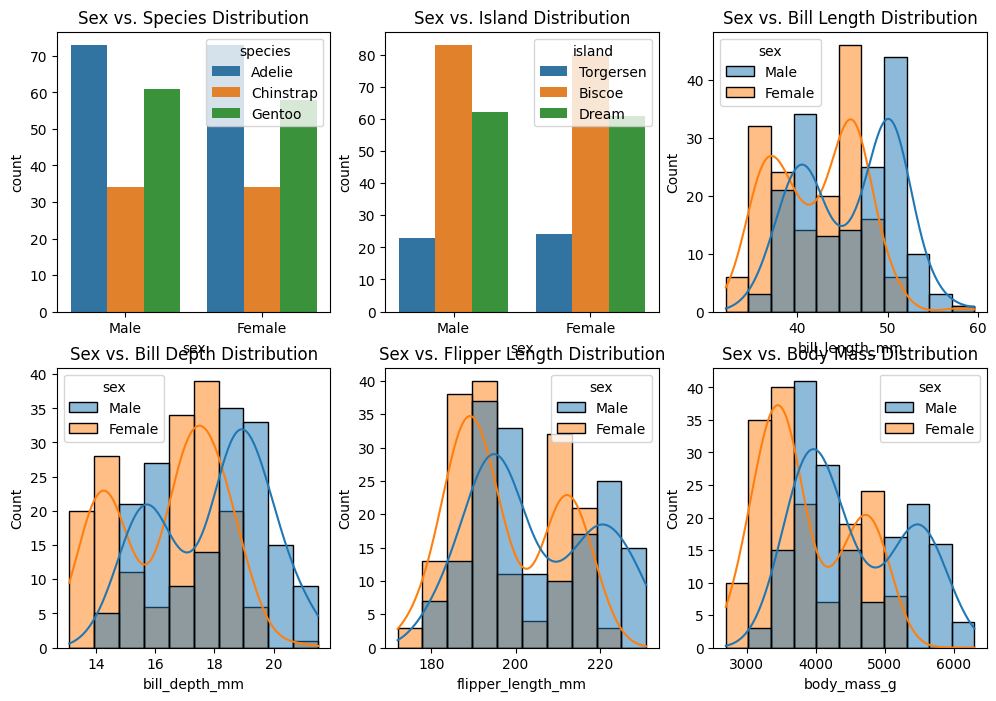

In [ ]:
import matplotlib.pyplot as plt

# 시각화를 위한 그래프 크기 설정
plt.figure(figsize=(12, 8))

# "sex"에 따른 "species" 분포 시각화
plt.subplot(231) # 2x3 그리드의 첫 번째 위치
sns.countplot(data=df, x="sex", hue="species")
plt.title("Sex vs. Species Distribution")

# "sex"에 따른 "island" 분포 시각화
plt.subplot(232)
sns.countplot(data=df, x="sex", hue="island")
plt.title("Sex vs. Island Distribution")

# "sex"에 따른 "bill_length_mm" 분포 시각화
plt.subplot(233)
sns.histplot(data=df, x="bill_length_mm", hue="sex", kde=True)
plt.title("Sex vs. Bill Length Distribution")

# "sex"에 따른 "bill_depth_mm" 분포 시각화
plt.subplot(234)
sns.histplot(data=df, x="bill_depth_mm", hue="sex", kde=True)
plt.title("Sex vs. Bill Depth Distribution")

# "sex"에 따른 "flipper_length_mm" 분포 시각화
plt.subplot(235)
sns.histplot(data=df, x="flipper_length_mm", hue="sex", kde=True)
plt.title("Sex vs. Flipper Length Distribution")

# "sex"에 따른 "body_mass_g" 분포 시각화
plt.subplot(236)
sns.histplot(data=df, x="body_mass_g", hue="sex", kde=True)
plt.title("Sex vs. Body Mass Distribution")

# 그래프 표시
plt.show()

## 결측치 해결 과정
행 번호 3번과 339번 데이터는 species와 island 열을 제외하면 모든 열의 데이터가 NaN이기에 행 자체를 제거하는 것이 좋겠다고 판단했다.  
나머지 행의 결측치는 성별(sex) 데이터에만 존재했는데, 성별 데이터와 다른 열의 데이터를 분석하여 유의미한 관련성이 있다면 관련된 열의 데이터를 기준으로 성별 데이터 결측치를 대체할 계획을 수립했다.  
그러나, 성별에 따른 species와 island는 관련성이 없었고, 나머지 열의 경우 성별이 남자일수록 그래프가 오른쪽으로 이동하는(값이 더 커지는) 경향성을 보이긴 했지만, 이 분석결과만으로는 결측치를 해결할 수 없었다.  
예를 들어 body_mass_g가 4875.0인 경우, 성별을 female로 설정하면 female 치곤 무거운 펭귄이지만 충분히 존재할 수 있는 펭귄이고, 성별을 male로 설정해도 male 치곤 가벼운 펭귄이지만 충분히 존재할 수 있는 펭귄이기 때문이다.  
따라서 성별을 특정한 값으로 대체하는 것 대신 결측치와 관련된 행들을 삭제하는 방법을 검토했다.  
결측치가 있는 행의 비율은 전체 데이터의 약 3.19%에 불과하기 때문에 결측치가 있는 행의 삭제로 인해 발생하는 데이터 손실 문제가 크지 않다고 판단했다.  
따라서 결측치가 있는 행들을 삭제하는 방식을 선택했다.

In [ ]:
df.dropna(inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
# Converting categorical data
sex = pd.get_dummies(df['sex'],drop_first=True)
island = pd.get_dummies(df['island'],drop_first=True)

In [ ]:
new_data = pd.concat([df,island,sex], axis=1)
new_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0,0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0,0,0


In [ ]:
species_names = new_data['species'].unique()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
y = new_data.species
y = y.map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
new_data.drop(['species', 'island', 'sex'],inplace=True,axis=1)
X = new_data[['bill_length_mm', 'bill_depth_mm']].values
X_hat = new_data # accuracy 측정 위해 생성

## n_neighbors = 6

weights='uniform'

Accuracy (weights='uniform'): 0.7910447761194029

confusion matrix (weights='uniform')


[[27  1  3]
 [ 9  4  0]
 [ 1  0 22]]
KNN (weights='uniform') 분류 보고서
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        31
           1       0.80      0.31      0.44        13
           2       0.88      0.96      0.92        23

    accuracy                           0.79        67
   macro avg       0.80      0.71      0.72        67
weighted avg       0.79      0.79      0.77        67

weights='distance'

Accuracy (weights='distance'): 0.8208955223880597

confusion matrix (weights='distance')


[[25  2  4]
 [ 5  8  0]
 [ 0  1 22]]
KNN (weights='distance') 분류 보고서
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.73      0.62      0.67        13
           2       0.85      0.96      0.90        23

    accuracy                           0.82  

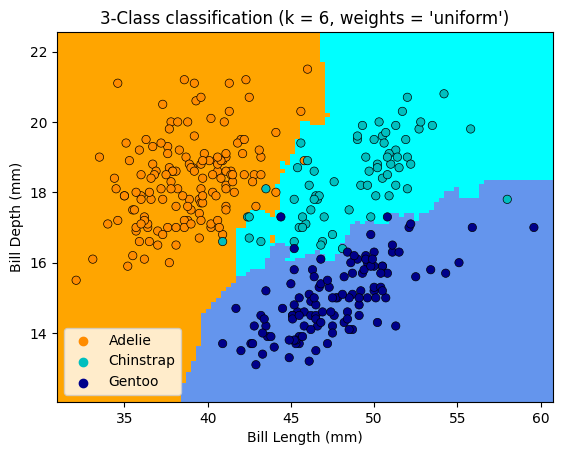

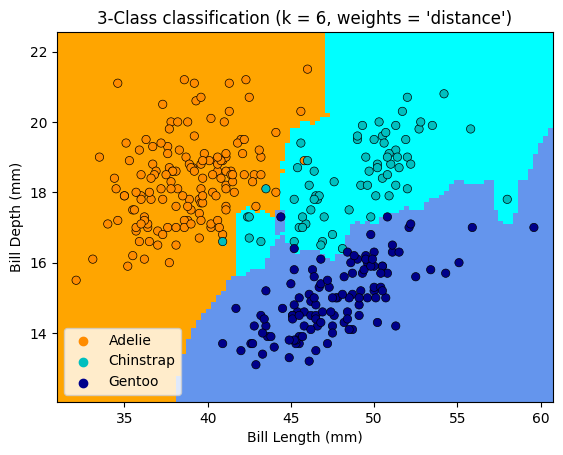

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

n_neighbors = 6

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2, random_state=42)

for weights in ["uniform", "distance"]:
    print("="*52)
    knn = KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    print(f"weights='{weights}'\n")
    # 테스트 데이터로 예측
    y_pred = knn.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy (weights='{weights}'): {accuracy}\n")

    # confusion matrix
    print(f"confusion matrix (weights='{weights}')\n\n")
    print(confusion_matrix(y_test,y_pred))

    # 분류 보고서 출력
    print(f"KNN (weights='{weights}') 분류 보고서")
    print(classification_report(y_test, y_pred))

    # knn 시각화
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Bill Length (mm)",
        ylabel="Bill Depth (mm)",
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=species_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

## n_neighbors = 25

weights='uniform'

Accuracy (weights='uniform'): 0.7910447761194029

confusion matrix (weights='uniform')


[[30  0  1]
 [12  1  0]
 [ 1  0 22]]
KNN (weights='uniform') 분류 보고서
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        31
           1       1.00      0.08      0.14        13
           2       0.96      0.96      0.96        23

    accuracy                           0.79        67
   macro avg       0.88      0.67      0.64        67
weighted avg       0.85      0.79      0.73        67

weights='distance'

Accuracy (weights='distance'): 0.8208955223880597

confusion matrix (weights='distance')


[[27  1  3]
 [ 7  6  0]
 [ 1  0 22]]
KNN (weights='distance') 분류 보고서
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.86      0.46      0.60        13
           2       0.88      0.96      0.92        23

    accuracy                           0.82  

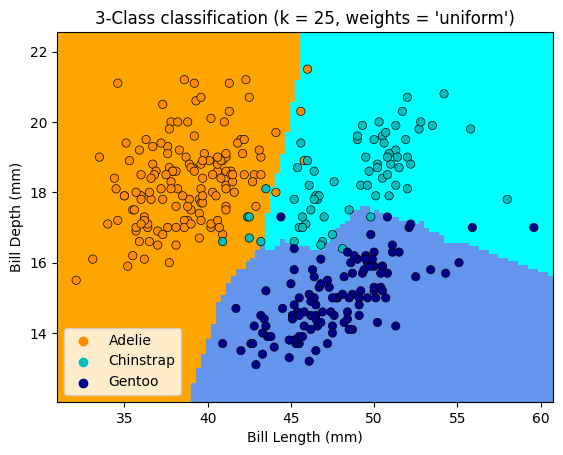

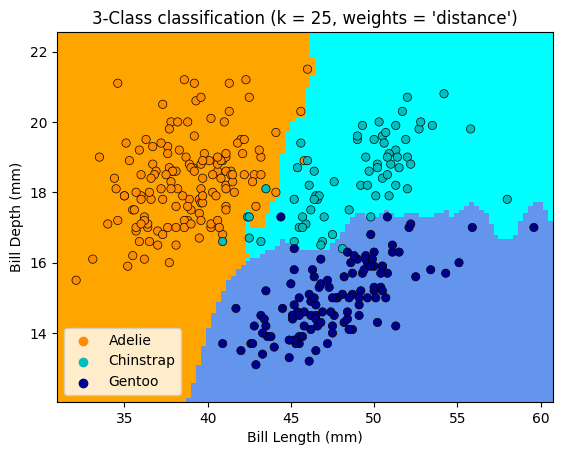

In [ ]:
n_neighbors = 25

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2, random_state=42)

for weights in ["uniform", "distance"]:
    print("="*52)
    knn = KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    print(f"weights='{weights}'\n")
    # 테스트 데이터로 예측
    y_pred = knn.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy (weights='{weights}'): {accuracy}\n")

    # confusion matrix
    print(f"confusion matrix (weights='{weights}')\n\n")
    print(confusion_matrix(y_test,y_pred))

    # 분류 보고서 출력
    print(f"KNN (weights='{weights}') 분류 보고서")
    print(classification_report(y_test, y_pred))

    # knn 시각화
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Bill Length (mm)",
        ylabel="Bill Depth (mm)",
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=species_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

# 결과 정리

생성한 모델 중 가장 높이 평가되는 모델은 3가지 모델(RandomForestClassifier, GaussianNB, KNN - neighbors.KNeighborsClassifier) 중 RandomForestClassifier이다.  
RandomForestClassifier의 Confusion Matrix  
[[32  1  0]  
 [ 0 15  0]  
 [ 0  0 19]]  

GaussianNB의 Confusion Matrix  
[[38  1  0]  
 [ 0 10  0]  
 [ 0  0 18]]  

KNN - neighbors.KNeighborsClassifier의 Confusion Matrix    
n=6, uniform  
[[27  1  3]  
 [ 9  4  0]  
 [ 1  0 22]]  

n=6, distance  
[[25  2  4]  
 [ 5  8  0]  
 [ 0  1 22]]  

n=25, uniform  
[[30  0  1]  
 [12  1  0]  
 [ 1  0 22]]  

n=25, distance  
[[27  1  3]  
 [ 7  6  0]  
 [ 1  0 22]]  

여기서 RandomForestClassifier의 Confusion Matrix와 GaussianNB의 Confusion Matrix를 보면 둘 모두 우수한 성능을 보인다는 걸 알 수 있는데, 둘을 더 자세히 비교하기 위해 classification_report를 살펴보면  

RandomForestClassifier의 classification_report  

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        19  

    accuracy                           0.99        67
    macro avg       0.98      0.99      0.98        67  
    weighted avg       0.99      0.99      0.99        67  

GaussianNB의 classification_report  

              precision    recall  f1-score   support  

           0       1.00      0.97      0.99        39
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67  
    macro avg       0.97      0.99      0.98        67  
    weighted avg       0.99      0.99      0.99        67  

RandomForestClassifier 모델의 성능이 근소하게 더 좋다는 것을 알 수 있다.